In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("philadelphia_2017.csv")

In [152]:
for column in ["start_time", "end_time"]:
    df[column] = pd.to_datetime(df[column])
    df[column+"_date"] = df[column].dt.date
    df[column+"_time"] = df[column].dt.time
    df[column+"_hour"] = df[column].dt.hour
    df[column+"_month"] = df[column].dt.month
    df[column+"_weekday"] = df[column].dt.weekday

In [15]:
# Es gibt Fälle wo die Fahrräder über mehrere Tage ausgeliehen weren
df[df["start_time"].dt.date < df["end_time"].dt.date]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
50,2017-01-01 02:03:00,2017-01-02 00:03:00,3004,3031,5236,Walk-up,Municipal Services Building Plaza,13th & Montgomery
178,2017-01-01 11:30:00,2017-01-02 14:21:00,3068,3000,3553,Indego30,Broad & Federal,Virtual Station
382,2017-01-01 14:26:00,2017-01-02 14:19:00,3047,3000,5240,Walk-up,"Independence Mall, NPS",Virtual Station
390,2017-01-01 14:30:00,2017-01-02 12:24:00,3070,3000,11030,Walk-up,"Spring Garden Station, MFL",Virtual Station
588,2017-01-01 17:01:00,2017-01-02 00:04:00,3005,3072,5127,Walk-up,"Welcome Park, NPS",Front & Carpenter
...,...,...,...,...,...,...,...,...
788677,2017-12-31 06:36:00,2018-01-02 12:04:00,3112,3000,11826,Walk-up,48th & Spruce,Virtual Station
788699,2017-12-31 09:09:00,2018-01-03 06:56:00,3073,3083,5411,Indego30,9th & Spring Garden,3083
788885,2017-12-31 21:28:00,2018-01-01 00:02:00,3055,3110,3649,Walk-up,8th & Market,Del. River Trail & Penn St.
788901,2017-12-31 23:01:00,2018-01-02 06:59:00,3071,3000,5309,Indego30,"32nd & Baring, Drexel Park",Virtual Station


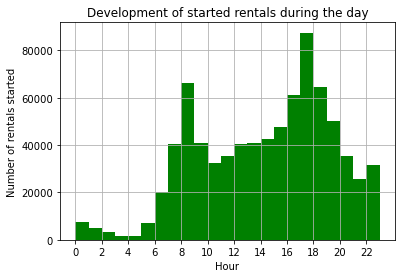

In [109]:
plt.hist(df["start_time_hour"], bins=range(0,24,1), color="green")
plt.xlabel("Hour")
plt.ylabel("Number of rentals started")
plt.title("Development of started rentals during the day")
plt.xticks(range(0,24,2))
plt.grid(True)
plt.show()

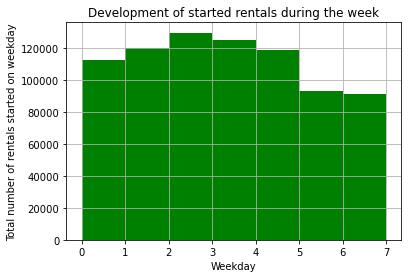

In [123]:
plt.hist(df["start_time_weekday"], bins=range(0,8,1), color="green")
plt.xlabel("Weekday")
plt.ylabel("Total number of rentals started on weekday")
plt.title("Development of started rentals during the week")
plt.xticks(range(0,8,1))
plt.grid(True)
plt.show()

In [106]:
# Calculate the average number of rentals for each day ( 52 number of weeks per year)
df_average_per_weekday = df.groupby(["start_time_weekday"])["start_time_weekday"].count().divide(52).reset_index(name="avg_number_started_rentals")

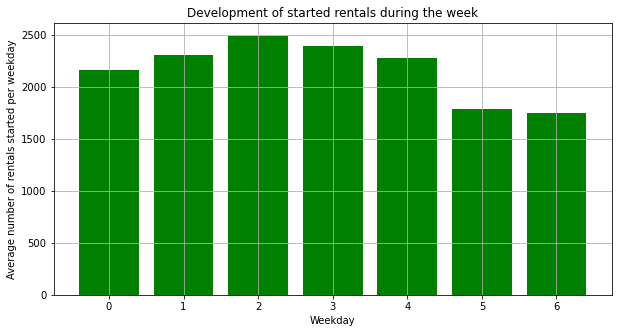

In [108]:
fig = plt.figure(figsize = (10, 5))
plt.bar(
        df_average_per_weekday["start_time_weekday"], 
        df_average_per_weekday["avg_number_started_rentals"], 
        color="green"
)
plt.xlabel("Weekday")
plt.ylabel("Average number of rentals started per weekday")
plt.title("Development of started rentals during the week")
plt.grid(True)
plt.show()

In [148]:
df.groupby(["start_time_month"])["start_time_month"].count().reset_index(name="number of started retals in month")

,start_time_month,number of started retals in month
0,1,31194
1,2,39557
2,3,37021
3,4,66158
4,5,69653
5,6,84630
6,7,91138
7,8,94552
8,9,91095
9,10,88092


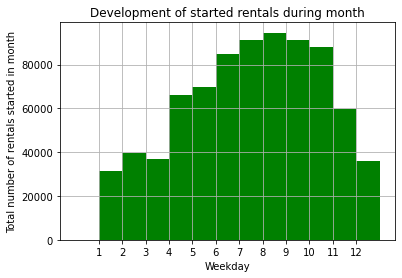

In [161]:
plt.hist(df["start_time_month"], bins=range(0,14,1), color="green")
plt.xlabel("Weekday")
plt.ylabel("Total number of rentals started in month")
plt.title("Development of started rentals during month")
plt.xticks(range(1,13,1))
plt.grid(True)
plt.show()

In [160]:
(df["start_time_month"] < df["end_time_month"]).any()
# es gibt Fälle in denen das Fahrrad im nächsten Monata zurückgegeben wurde

True

#### We calculate how many bikes in the respective hours were in use accumulated over the year. (e.g. Rental from 0 o'clock to 2:45 would count as a usage in hour 0, 1 and 2) We have to considere in this case that bikes can be rented out for several days.

In [203]:
df_values = pd.DataFrame()
for i in range(0,24,1):
    df_values[f"{i}"]= ((df["start_time_hour"] <= i) & (df["end_time_hour"] >= i)) | ((df["end_time_hour"] >= i) & (df["start_time_date"] < df["end_time_date"]))

df_sum = df_values.apply(lambda x: x.sum()/365).reset_index(name="avg_n_of_bikes_in_use").rename(columns={"index": "hour"})

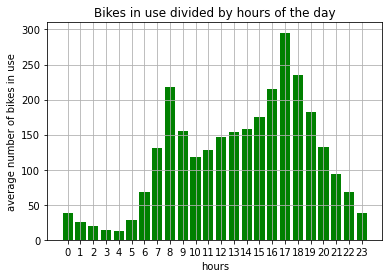

In [204]:
plt.bar(df_sum["hour"], df_sum["avg_n_of_bikes_in_use"], color="green")
plt.xlabel("hours")
plt.ylabel("average number of bikes in use")
plt.title("Bikes in use divided by hours of the day")
plt.grid(True)
plt.show()